In [3]:
import matplotlib.pyplot as plt
import numpy as np
from tqdm import tqdm

In [4]:
def _ode(Z: np.complex128, a: float, w: float):
    return Z * (a + 1j * w - np.abs(Z) ** 2)

In [5]:
dt = 1e-5
times = np.arange(0, 30, dt)
Npoints = len(times)

Z = dt * np.random.uniform(size=Npoints) + 1j * dt * np.random.uniform(size=Npoints)

In [50]:
for t in tqdm(range(Npoints - 1)):
    Z[t + 1] = Z[t] + dt * _ode(Z[t], 0, np.pi * 2 * 1) + dt * 1

100%|████████████████████████████| 2999999/2999999 [00:02<00:00, 1327661.35it/s]


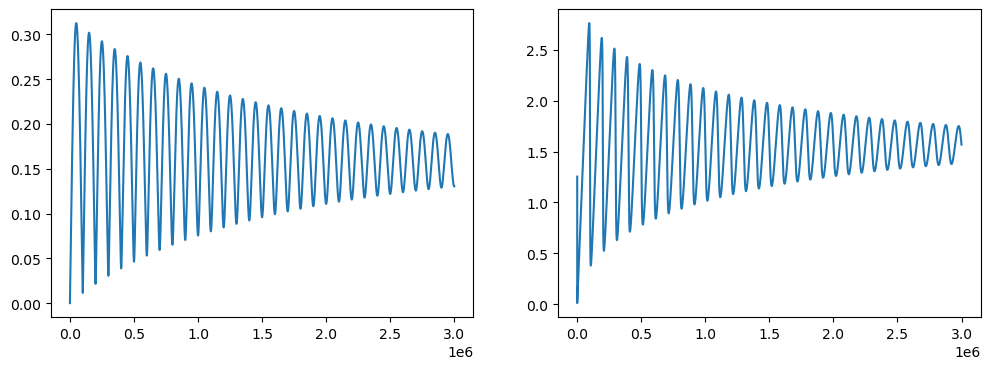

In [51]:
plt.figure(figsize=(12, 4))
plt.subplot(121)
plt.plot(np.abs(Z))
plt.subplot(122)
plt.plot(np.angle(Z))

/tmp/ipykernel_69184/3192880847.py:3: RuntimeWarning: invalid value encountered in power
  plt.plot( np.cos(np.pi * 2 * 1 * times) ** (1 / 3) )


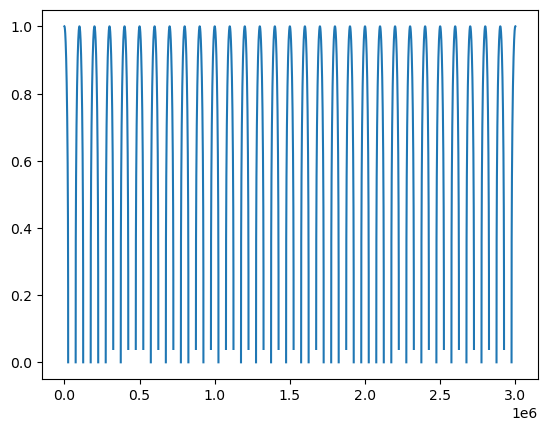

In [8]:
theta = np.unwrap(np.angle(Z))

plt.plot(np.cos(np.pi * 2 * 1 * times) ** (1 / 3))

In [9]:
from scipy.optimize import newton

In [26]:
def func(r, a, I, omega):
    return a * r - r**3 + np.sqrt(I**2 - r**2 * omega**2)

In [27]:
a = np.linspace(-10, 10)
omega = np.linspace(1, 40) * np.pi * 2

roots = np.zeros((len(a), len(omega)))
for i in range(len(a)):
    for j in range(len(omega)):
        roots[i, j] = newton(func, a[i], fprime, args=(a[i], 0, omega[j]))

/tmp/ipykernel_69184/2891311138.py:2: RuntimeWarning: invalid value encountered in sqrt
  return a * r - r ** 3 + np.sqrt(I**2 - r**2 * omega**2)


RuntimeError: Failed to converge after 50 iterations, value is nan.

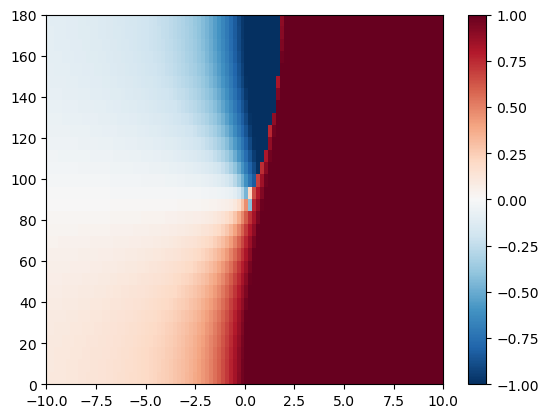

In [267]:
plt.imshow(
    roots.T,
    aspect="auto",
    cmap="RdBu_r",
    origin="lower",
    extent=[min(a), max(a), min(theta) * 180 / np.pi, max(theta) * 180 / np.pi],
    vmin=-1,
    vmax=1,
)
plt.colorbar()

/tmp/ipykernel_69184/602920169.py:7: RuntimeWarning: invalid value encountered in sqrt
  plt.plot(r, a * r - r**3 + np.sqrt(I**2 - r**2 * omega**2))


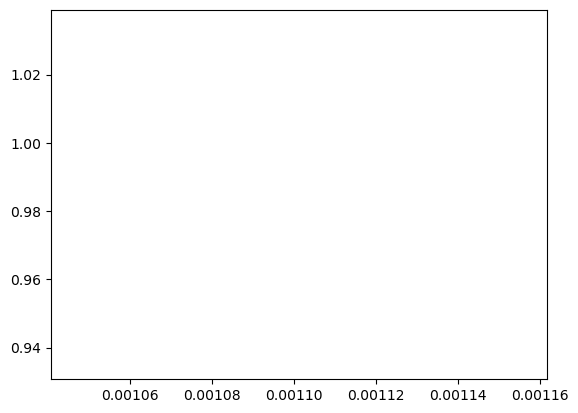

In [42]:
r = np.linspace(-1e-1, 1e1, 1000)
I = 1
omega = 20 * 2 * np.pi
a = -5


plt.plot(r, a * r - r**3 + np.sqrt(I**2 - r**2 * omega**2))

In [43]:
a * r - r**3 + np.sqrt(I**2 - r**2 * omega**2)

/tmp/ipykernel_69184/2974431063.py:1: RuntimeWarning: invalid value encountered in sqrt
  a * r - r**3 + np.sqrt(I**2 - r**2 * omega**2)


array([       nan,        nan,        nan,        nan,        nan,
              nan,        nan,        nan,        nan,        nan,
       0.98487532,        nan,        nan,        nan,        nan,
              nan,        nan,        nan,        nan,        nan,
              nan,        nan,        nan,        nan,        nan,
              nan,        nan,        nan,        nan,        nan,
              nan,        nan,        nan,        nan,        nan,
              nan,        nan,        nan,        nan,        nan,
              nan,        nan,        nan,        nan,        nan,
              nan,        nan,        nan,        nan,        nan,
              nan,        nan,        nan,        nan,        nan,
              nan,        nan,        nan,        nan,        nan,
              nan,        nan,        nan,        nan,        nan,
              nan,        nan,        nan,        nan,        nan,
              nan,        nan,        nan,        nan,        